# State-space analyses

Written by Ladislas Nalborczyk (ladislas.nalborczyk@gmail.com). Last updated on February 6, 2024.

In [31]:
# !yes | pip uninstall meg_decoding_tools
# ! pip install git+https://github.com/lnalborczyk/meg_decoding_tools
# ! pip install git+https://github.com/mitchellostrow/DSA

In [1]:
import mne
import numpy as np
from meeg.latent import compare_pca_through_time
from meeg.plots import compare_neural_trajectories_2d, compare_neural_trajectories_3d

In [2]:
# importing the examplary data (MNE epochs of MEG data)
visual_4l2s = mne.read_epochs("../src/meeg/data/visual_4l2s-epo.fif")
visual_7l2s = mne.read_epochs("../src/meeg/data/visual_7l2s-epo.fif")

Reading /Users/ladislas/Desktop/meg_decoding_tools/examples/../src/meeg/data/visual_4l2s-epo.fif ...


    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Adding metadata with 13 columns
160 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/ladislas/Desktop/meg_decoding_tools/examples/../src/meeg/data/visual_7l2s-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Adding metadata with 13 columns
159 matching events found
No baseline correction applied
0 projection items activated


In [28]:
# computing average neural trajectories (and across-trial SD) in a common PCA space
epochs1_pca, epochs1_pca_std, epochs2_pca, epochs2_pca_std = compare_pca_through_time(visual_4l2s, visual_7l2s, n_components=10)

Adding metadata with 13 columns
319 matching events found
No baseline correction applied


/Users/ladislas/Desktop/meg_decoding_tools/.venv/lib/python3.10/site-packages/meeg/latent/trajectories.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials1 = epochs1.get_data()
/Users/ladislas/Desktop/meg_decoding_tools/.venv/lib/python3.10/site-packages/meeg/latent/trajectories.py:43: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials2 = epochs2.get_data()


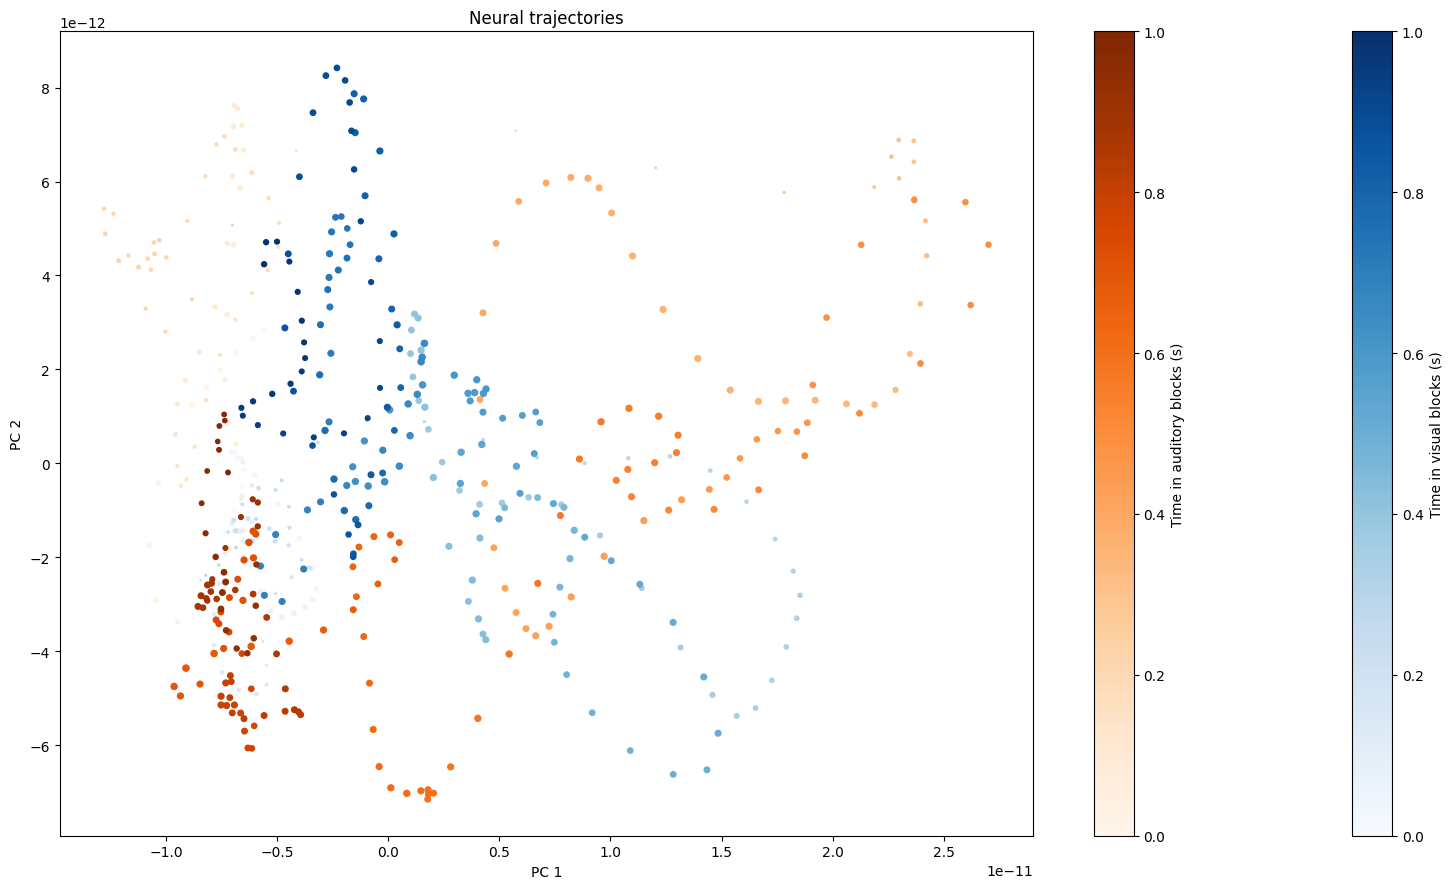

In [29]:
compare_neural_trajectories_2d(
    x_pca1=epochs1_pca, x_pca2=epochs2_pca,
    x_pca_std1=epochs1_pca_std, x_pca_std2=epochs2_pca_std,
    fs=1/250,
    plot_title="Neural trajectories"
    );

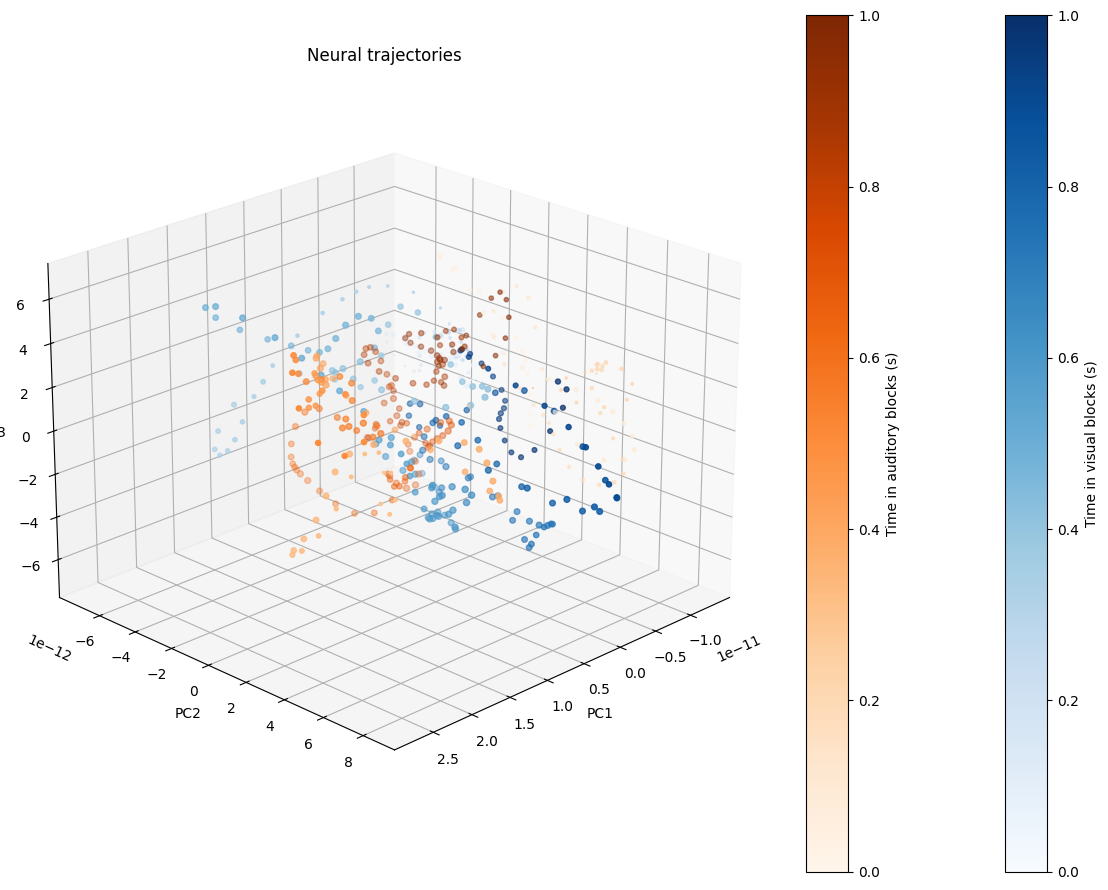

In [30]:
compare_neural_trajectories_3d(
    x_pca1=epochs1_pca, x_pca2=epochs2_pca,
    x_pca_std1=epochs1_pca_std, x_pca_std2=epochs2_pca_std,
    fs=1/250,
    plot_title="Neural trajectories"
    );

In [49]:
from meeg.latent import trajectories

# computing mean, std, speed, and curvature of latent trajectory
pca_mean, pca_std, speed, curvature = trajectories.stats_trajectories(epochs=visual_4l2s, n_components=10)

# sanity check
print(pca_mean.shape, pca_std.shape, speed.shape, curvature.shape)

AttributeError: module 'meeg.latent.trajectories' has no attribute 'stats_trajectories'